# Benchmarking kd range search

In [13]:
import Task31
import Task43
import Task51
import Task53
from sanitize_input import Tests
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import count

In [14]:
def random_coords(n,d):
    return [[random.randrange(1, 1000, 1) for _ in range(d)] for _ in range(n)]
#random.randrange(i, 1000, 1)
random_coords(4, 2)

[[849, 931], [60, 281], [936, 330], [806, 80]]

In [15]:
d2n10 = random_coords(10, 2)
d2n100 = random_coords(100, 2)
d2n1_000 = random_coords(1000, 2)
d2n10_000 = random_coords(10_000, 2)
d2n100_000 = random_coords(100_000, 2)
d2n1_000_000 = random_coords(1_000_000, 2)
n_sizes = [d2n10, d2n100, d2n1_000, d2n10_000, d2n100_000, d2n1_000_000] 

In [16]:
#n_sizes[0][0]

In [17]:
def create_test_ns(d):
    return [random_coords(10**i, d) for i in range(1,7)]

In [18]:
#lbound, ubound = (250, 250), (600, 600)
#lbound, ubound = [250]*2, [600]*2
#len(n_sizes[-1])

## Naïve

In [19]:
def random_boundkd(d):
    a = [random.randrange(1, 999, 1) for _ in range(d)]
    b = [random.randrange(i, 1000, 1) for i in a]
    return a,b

In [9]:
random_boundkd(5)

([392, 161, 912, 557, 569], [697, 323, 954, 598, 592])

In [20]:
def bruteforce(n, *_, d=2, c=100):
    res = []
    bounds = [random_boundkd(d) for _ in range(c)]
    for e in n:
        bres = []
        b = len(e)
        print(f'---{b}---')
        for l, u in bounds:        
            a = %timeit -o -r1 list(Task31.simple_range_query(e, l, u))
            bres.append(a)
        res.append((b,bres))
    return res

In [ ]:
bruteforce(n_sizes, 1231231,12312313, 999,2)

Above is the naïve implementation times, as you can see it looks like a constant operation from ten to a million

## Build KD-Tree

In [21]:
def build_kd_tree(n, *_, d=2, c=100):
    res = []
    for e in n:
        bres = []
        b = len(e)
        print(f'---{b}---')
        for i in (random_coords(b, d) for _ in range(c)):
            a = %timeit -o -r1 Task43.KDTree(i)
            bres.append(a)
        res.append((b,bres))
    return res

In [ ]:
build_kd_tree(n_sizes)

## KD-Tree without Contained()

In [22]:
def kd_tree_without_contained(e, *_, d=2, c=100):
    res = []
    bounds = [random_boundkd(d) for _ in range(c)]
    for n in e: 
        d = len(n)
        a = Task43.KDTree(n).root
        bres = []
        print(f'---{d}---')
        for l, u in bounds:
            b = list(zip(l, u))
            c = %timeit -o -r1 Task53.get_range(a, b)
            bres.append(c)
        res.append((d, bres))
    return res

In [ ]:
kd_tree_without_contained(n_sizes, lbound, ubound)

## KD-Tree with Contained()

In [23]:
def kd_tree_with_contained(e, *_, d=2, c=100):
    res = []
    bounds = [random_boundkd(d) for _ in range(c)]
    for n in e:
        bres = []
        d = len(n)
        a = Task43.KDTree(n).root
        print(f'---{d}---')
        for l, u in bounds:
            b = list(zip(l, u))
            c = %timeit -o -r1 Task51.get_range(a, b)
            bres.append(c)
        res.append((d, c))
    return res

In [ ]:
kd_tree_with_contained(n_sizes, lbound, ubound)

## Build KD-Tree and run without contained

In [99]:
"""
def kd_tree_without_contained_plus_build(e, lbound, ubound):
    res = []
    for n in e:
        d = len(n)
        b = list(zip(lbound, ubound))
        c = %timeit -o -r1 Task53.get_range(Task43.KDTree(n).root, b)
        res.append((d, c))
    return res
    """

'\ndef kd_tree_without_contained_plus_build(e, lbound, ubound):\n    res = []\n    for n in e:\n        d = len(n)\n        b = list(zip(lbound, ubound))\n        c = %timeit -o -r1 Task53.get_range(Task43.KDTree(n).root, b)\n        res.append((d, c))\n    return res\n    '

In [ ]:
kd_tree_without_contained_plus_build(n_sizes, lbound, ubound)

## Build KD-Tree and run with contained

In [100]:
"""
def kd_tree_with_contained_plus_build(e, lbound, ubound):
    res = []
    bounds = [random_boundkd(len(e[0][0])) for _ in range(100)]
    for n in e:
        d = len(n)
        bres = []
        for l, u in bounds:
            b = list(zip(l, u))
            c = %timeit -o -r1 Task51.get_range(Task43.KDTree(n).root, b)
            bres.append(c)
        res.append((d,bres))
    return res
    """

'\ndef kd_tree_with_contained_plus_build(e, lbound, ubound):\n    res = []\n    bounds = [random_boundkd(len(e[0][0])) for _ in range(100)]\n    for n in e:\n        d = len(n)\n        bres = []\n        for l, u in bounds:\n            b = list(zip(l, u))\n            c = %timeit -o -r1 Task51.get_range(Task43.KDTree(n).root, b)\n            bres.append(c)\n        res.append((d,bres))\n    return res\n    '

In [ ]:
kd_tree_with_contained_plus_build(n_sizes, lbound, ubound)

## Plot

In [24]:
def print_thing(r, nam):
    print(nam)
    return [(i, m.average, m.stdev) for i, m in r]

In [43]:
def try_bounds2():
    res = []
    funcs = [bruteforce, build_kd_tree, kd_tree_without_contained, kd_tree_with_contained]
    ds= [2,3,5,10,50]
    es = (random_coords(1_000_000, d) for d in ds)
    for d, e in zip(ds, es):
        print(d,len(e))
        bres = []
        print(d)
        for f in funcs:
            print(f.__name__)
            bres.append((f.__name__, f([e], d=d)))
        res.append(bres)
    return res

In [26]:
def try_bounds(es, d=2):
    funcs = [bruteforce, build_kd_tree, kd_tree_without_contained, kd_tree_with_contained]
    return [(f.__name__, f(create_test_ns(2), d=d)) for f in funcs if not print(f.__name__)]

In [ ]:
try_bounds(create_test_ns(2))

In [44]:
try_bounds2()

2 1000000
2
bruteforce
---1000000---
1.15 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


KeyboardInterrupt: 

In [36]:
dis2 = try_bounds(n_sizes, 250, 600, 2)
dis2

13 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
147 µs ± 52.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 4.89 times longer than the fastest. This could mean that an intermediate result is being cached.
2.65 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.8 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
127 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.6 s ± 494 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
bruteforce
73.9 µs ± 36.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
413 µs ± 26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.92 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
65.6 ms ± 6.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
926 ms ± 95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.5 s ± 1.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
build_kd_tree
69.9 µs ± 11.4 

[('bruteforce',
  [(10, 1.2972384111428385e-05, 1.478737693439387e-06),
   (100, 0.00014680019728571095, 5.277834243963537e-05),
   (1000, 0.002650435030000478, 0.0015032741732607284),
   (10000, 0.013801218200004378, 0.002801977961529092),
   (100000, 0.12669490034285705, 0.01886889928501408),
   (1000000, 1.5965255858572098, 0.49395086309808217)]),
 ('build_kd_tree',
  [(10, 7.386937682857544e-05, 3.6633001434443615e-05),
   (100, 0.0004130407484285895, 2.598261357524954e-05),
   (1000, 0.004918282662856329, 0.00021187892938948497),
   (10000, 0.06555638945714495, 0.006169344337513393),
   (100000, 0.926156942428601, 0.09498437477723014),
   (1000000, 13.469858728714273, 1.236104434467911)]),
 ('kd_tree_without_contained',
  [(10, 6.9933714900003e-05, 1.144825926637189e-05),
   (100, 0.00032231912214284163, 4.9637089323020246e-05),
   (1000, 0.0017398829114283997, 0.0002807358442541),
   (10000, 0.013602031311428878, 0.0006121789835990278),
   (100000, 0.11344166921428496, 0.00747016

In [ ]:
dis

In [ ]:
dis10 = try_bounds(create_test_ns(10), 250, 600, 10)

In [ ]:
dis10

In [41]:
dis50 = try_bounds(create_test_ns(50), 250, 600, 50)
dis50

13.8 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
121 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.27 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.8 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
133 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.65 s ± 608 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
bruteforce
42.5 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
536 µs ± 162 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.8 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
91.6 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.13 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
24.3 s ± 6.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
build_kd_tree
944 µs ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.65 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 1

[('bruteforce',
  [(10, 1.380939182428522e-05, 1.9895681882955838e-06),
   (100, 0.00012058693261429069, 1.1069241109773865e-05),
   (1000, 0.0012671938071431605, 0.0001832818502279957),
   (10000, 0.013834958118571715, 0.0010602848893130346),
   (100000, 0.1328738907143036, 0.007739252440018444),
   (1000000, 1.6538853477142896, 0.6077016669502632)]),
 ('build_kd_tree',
  [(10, 4.248964299999898e-05, 1.8856938134975154e-05),
   (100, 0.000535864766428566, 0.00016173911694259386),
   (1000, 0.0077954443428568864, 0.0011843224705839412),
   (10000, 0.09155392862857233, 0.020128857804307704),
   (100000, 1.1326247291427924, 0.12148482344456263),
   (1000000, 24.251838890142803, 6.395836965793272)]),
 ('kd_tree_without_contained',
  [(10, 0.0009443830984285536, 5.5857464749830096e-05),
   (100, 0.007652535275714009, 0.0018878177017414078),
   (1000, 0.07844635611428917, 0.007894234621724078),
   (10000, 0.7769467308570971, 0.06976246586186018),
   (100000, 6.777134841857072, 0.21746126609

In [34]:
def generate_dimension(lbound, ubound, ds):
    return [([lbound]*e, [ubound]*e) for e in ds]

In [2]:
def try_bounds2(lo, up):
    a = [1,2,3,5,10,50]
    d = generate_dimension(lo, up, a)
    print(d[0])
    es = [random_coords(1000, i) for i in a]
    funcs = [bruteforce, build_kd_tree, kd_tree_without_contained, kd_tree_with_contained]
#         kd_tree_without_contained_plus_build, kd_tree_with_contained_plus_build]
    res = []
    for l,u in d:
        for f in funcs:
            print(f.__name__)
            res.append((f.__name__, f(es, l, u), f.__name__))
    return res

In [36]:
disn = try_bounds2(250, 600)

([250], [600])
978 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.04 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


KeyboardInterrupt: 

In [ ]:
with open('results.txt', 'w') as f:
    af = '\n'.join(str(e) for e in dis)
    f.write(af)

## plot plan
Plan is probably to display the data from a np dataframe to matplotlib. The plot will probably be line graphs with ranges such as: precise (within 20%), with all on 1 side of median and not, broad (80%), middle (50%) and 1 element query. 

In [ ]:
%matplotlib inline

In [ ]:
names = ["Bruteforce", "Build KD-tree", "KD-tree only intersection", "KD-tree with contained"] 
#         "KD-tree build + intersection only search", "KD-tree build + with contained search"]

In [32]:
def draw_plot(n, data, title):
    fig, ax = plt.subplots()
    a = [str(10**i) for i in range(1,n)]
    for p,i in enumerate(data):
        plt.yscale('log')
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
#        print(err,'WOOT', v)
#        print(a, v, err)
        ax.errorbar(a, v, err, fmt='-|', elinewidth=10, barsabove=1, label=names[p])
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    #width = 12.9
    #format_axes(ax)
    #latexify(width, width*(sqrt(5)-1.0)/2.0 )
    fig.savefig(f"{title}.png")
    plt.show()
#draw_plot(7, dis, "Time taken for a single 2d range search")

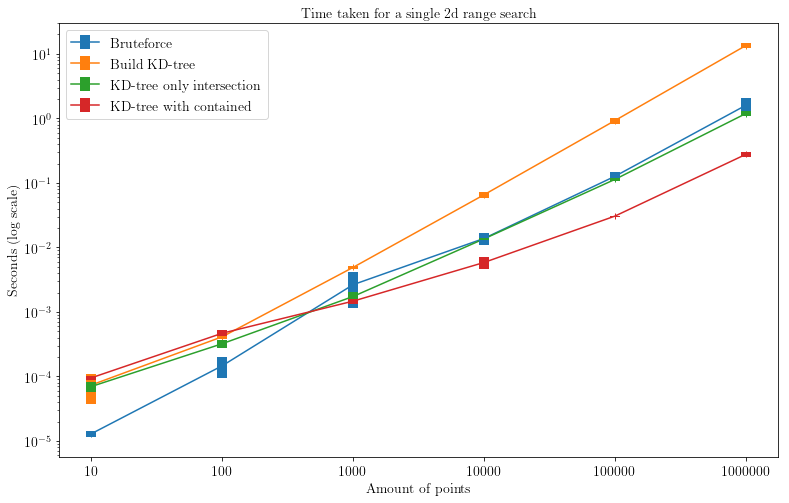

In [38]:
draw_plot(7, dis2, "Time taken for a single 2d range search")

In [ ]:
draw_plot(7, dis10, "Time taken for a single 10d range search")

In [ ]:
draw_plot(7, dis100, "Time taken for a single 100d range search")

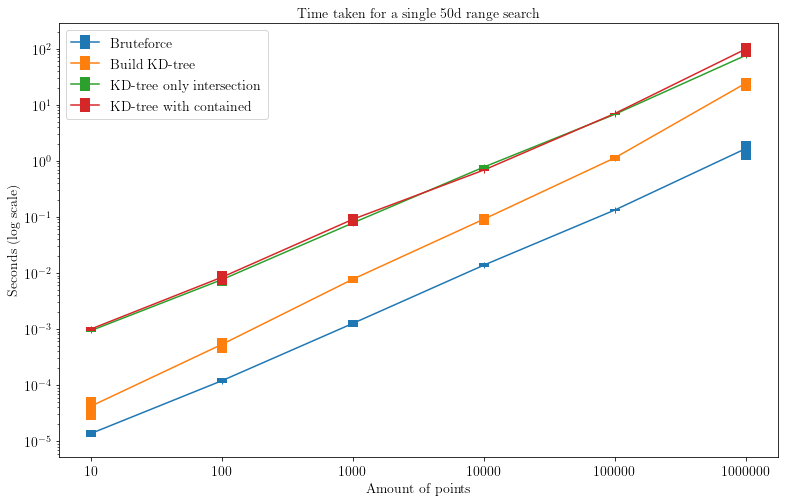

In [42]:
draw_plot(7, dis50, "Time taken for a single 50d range search")

In [ ]:
draw_plot(7, dis10, "Time taken for a single 10d range search")

In [ ]:
#plt.tight_layout()
#format_axes(ax)
#fig.savefig("250-600_plot.png")

In [ ]:
dis[0][1]

In [ ]:
#import pandas as pd
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

In [ ]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 14, # fontsize for x and y labels (was 10)
              'axes.titlesize': 14,
#              'text.fontsize': 10, # was 10
              'legend.fontsize': 14, # was 10
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)
    return ax

In [45]:
import pickle

In [ ]:
var_ele = try_bounds(create_test_ns(2))

In [ ]:
var_dim = try_bounds2()

In [46]:
import pickle
pickle.dump( var_ele, open( "variable_elements.p", "wb" ) )
pickle.dump( var_dim, open( "variable_dimensions.p", "wb"))

NameError: name 'var_ele' is not defined